In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [11]:
data_set= pd.read_csv('diabetes.csv')
data_set

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,32,1
3,89,66,23,94,28.1,0.167,21,0
4,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


In [12]:
x= data_set.iloc[:,[0,1,2,3,4,5,6]].values
y= data_set.iloc[:,7].values
x,y

(array([[148.   ,  72.   ,  35.   , ...,  33.6  ,   0.627,  50.   ],
        [ 85.   ,  66.   ,  29.   , ...,  26.6  ,   0.351,  31.   ],
        [183.   ,  64.   ,   0.   , ...,  23.3  ,   0.672,  32.   ],
        ...,
        [121.   ,  72.   ,  23.   , ...,  26.2  ,   0.245,  30.   ],
        [126.   ,  60.   ,   0.   , ...,  30.1  ,   0.349,  47.   ],
        [ 93.   ,  70.   ,  31.   , ...,  30.4  ,   0.315,  23.   ]]),
 array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
        0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
        1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 

In [13]:
X,Y=make_classification(n_samples=768,n_redundant=0,n_repeated=0,n_classes=2,random_state=14)
X_train, X_test, y_train, y_test= train_test_split(x, y, test_size=0.5,random_state=32)
sc = StandardScaler()
sc.fit(X_train)
X_train=sc.transform(X_train)
sc.fit(X_test)
X_test= sc.transform(X_test)
X.shape
error1= []
error2= []
for k in range(1,150):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred1= knn.predict(X_train)
    error1.append(np.mean(y_train!= y_pred1))
    y_pred2= knn.predict(X_test)
    error2.append(np.mean(y_test!= y_pred2))

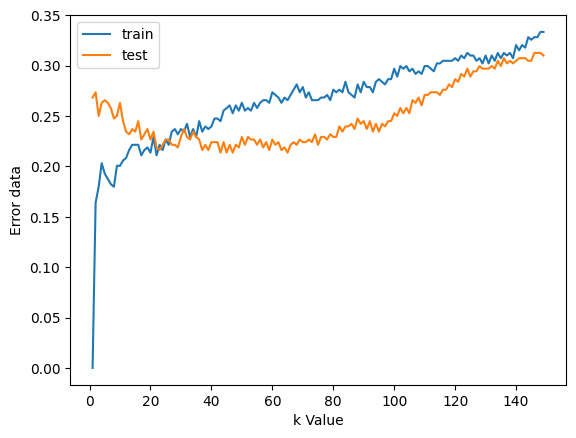

In [14]:
plt.plot(range(1,150),error1,label="train")
plt.plot(range(1,150),error2,label="test")
plt.xlabel('k Value')
plt.ylabel('Error data')
plt.legend()

In [15]:
knn= KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
y_pred= knn.predict(X_test)
print('The accuracy is as follows :')
print(metrics.accuracy_score(y_test,y_pred)*100,'%')
print('Mean Absolute Error : ',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error : ',metrics.mean_squared_error(y_test,y_pred))

The accuracy is as follows :
74.21875 %
Mean Absolute Error :  0.2578125
Mean Squared Error :  0.2578125
